In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_labels = pd.read_csv("/home/jcropano/Documentos/TP1/Organizacion-de-Datos/datos/train_labels.csv")
train_labels.head(10)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


In [3]:
train_values = pd.read_csv("/home/jcropano/Documentos/TP1/Organizacion-de-Datos/datos/train_values.csv")
train_values.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,...,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Para el primer análisis, queremos ver el daño de las casas según su antiguedad.
#Filtramos las columnas importantes.
building_age = train_values.loc[:,['building_id' , 'age']]
building_age.head(10)

,building_id,age
0,802906,30
1,28830,10
2,94947,10
3,590882,10
4,201944,30
5,333020,10
6,728451,25
7,475515,0
8,441126,15
9,989500,0


In [5]:
#Hacemos el merge según building_id
damage_age = building_age.merge(train_labels)
damage_age.head(10)

,building_id,age,damage_grade
0,802906,30,3
1,28830,10,2
2,94947,10,3
3,590882,10,2
4,201944,30,3
5,333020,10,2
6,728451,25,3
7,475515,0,1
8,441126,15,2
9,989500,0,1


In [6]:
#Verificamos si hay NANs, pero no tiene.
damage_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   age           260601 non-null  int64
 2   damage_grade  260601 non-null  int64
dtypes: int64(3)
memory usage: 8.0 MB


In [7]:
damage_age_filtered = damage_age.loc[:,['age', 'damage_grade']]

In [8]:
damage_age_filtered.value_counts()

age  damage_grade
10   2               22370
15   2               20767
5    2               19030
20   2               18603
25   2               14073
                     ...  
150  1                   1
135  1                   1
115  1                   1
140  3                   1
110  1                   1
Length: 107, dtype: int64

In [9]:
#Experimentando...
grouped_by_damage = damage_age_filtered.groupby(['damage_grade']).mean()
grouped_by_damage = grouped_by_damage.reset_index()
col_rename = {'age':'age_mean'}
grouped_by_damage = grouped_by_damage.rename(columns = col_rename)
grouped_by_damage.head(10)

,damage_grade,age_mean
0,1,17.320490
1,2,27.342118
2,3,27.817423


Text(0, 0.5, 'Edad Promedio')

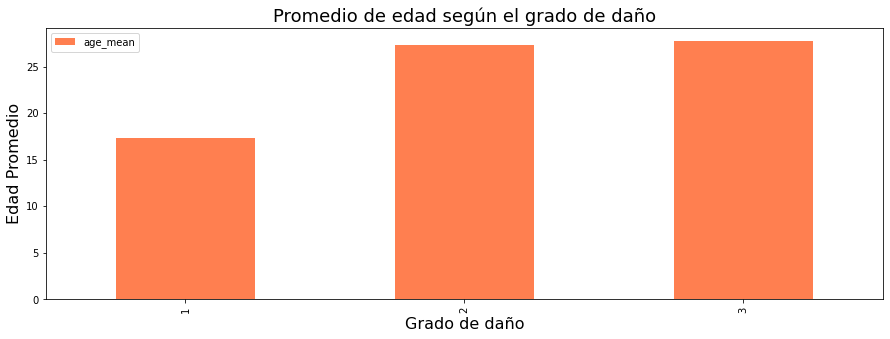

In [10]:
g = grouped_by_damage.set_index('damage_grade').plot(kind = 'bar', figsize = (15, 5), color = 'coral')
g.set_title('Promedio de edad según el grado de daño', fontsize = 18)
g.set_xlabel('Grado de daño', fontsize = 16)
g.set_ylabel('Edad Promedio', fontsize = 16)

In [11]:
grouped_by_age = damage_age_filtered.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
grouped_by_age.nlargest(10, 'houses_count')

,age,damage_grade_mean,houses_count
2,10,2.200689,38896
3,15,2.263455,36010
1,5,2.103481,33697
4,20,2.300510,32182
0,0,1.957529,26041
5,25,2.329599,24366
6,30,2.349678,18028
7,35,2.351074,10710
8,40,2.369827,10559
10,50,2.380460,7257


Text(0, 0.5, 'Grado de daño promedio')

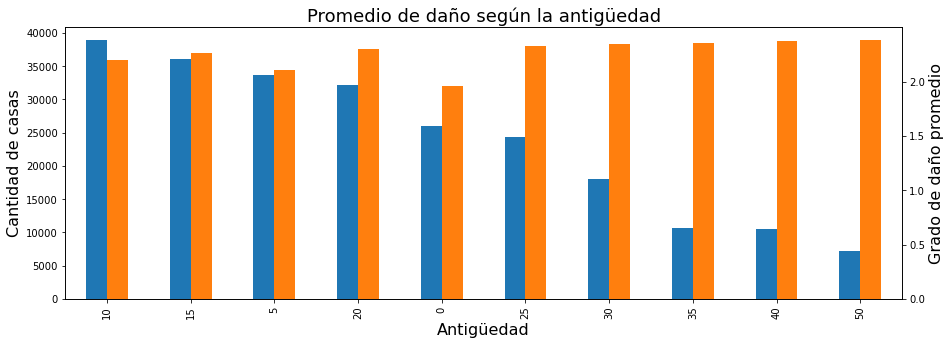

In [12]:
frequent_ages = grouped_by_age.set_index('age').nlargest(10, 'houses_count')
new_col_order = ['houses_count', 'damage_grade_mean']
frequent_ages = frequent_ages[new_col_order]
g = frequent_ages.plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)

Text(0, 0.5, 'Grado de daño promedio')

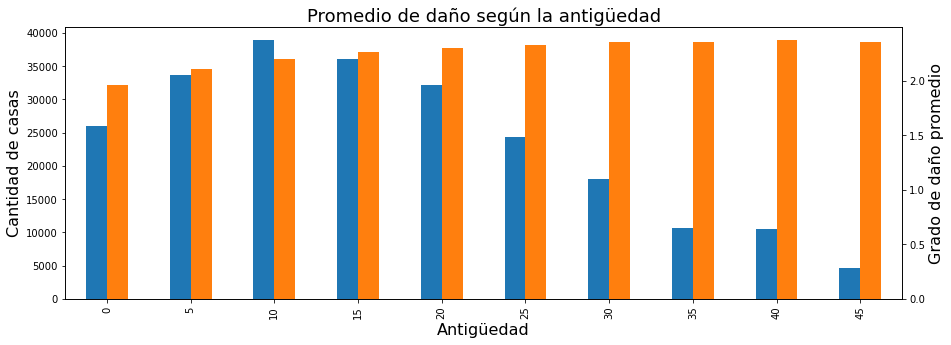

In [13]:
#Como sugerencia de Alexis, probamos ordenar el eje x por los años de menor a mayor.
frequent_ages = grouped_by_age.set_index('age').head(10)
new_col_order = ['houses_count', 'damage_grade_mean']
frequent_ages = frequent_ages[new_col_order]
g = frequent_ages.plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)

In [14]:
#Para el segundo análisis, queremos ver la relación entre altura y área del edificio y el daño recibido.
#Filtramos las columnas importantes.
#Como sugerencia de Alexis, hacemos una comparación entre la edad y el área con el daño, así como también
#la edad y altura con el daño.
building_age = train_values.loc[:,['age', 'building_id' , 'area_percentage', 'height_percentage']]
building_age.head(10)

,age,building_id,area_percentage,height_percentage
0,30,802906,6,5
1,10,28830,8,7
2,10,94947,5,5
3,10,590882,6,5
4,30,201944,8,9
5,10,333020,9,5
6,25,728451,3,4
7,0,475515,8,6
8,15,441126,8,6
9,0,989500,13,4


In [15]:
#Hacemos el merge según building_id
damage_area_height = building_age.merge(train_labels)
damage_area_height.head(10)

,age,building_id,area_percentage,height_percentage,damage_grade
0,30,802906,6,5,3
1,10,28830,8,7,2
2,10,94947,5,5,3
3,10,590882,6,5,2
4,30,201944,8,9,3
5,10,333020,9,5,2
6,25,728451,3,4,3
7,0,475515,8,6,1
8,15,441126,8,6,2
9,0,989500,13,4,1


In [16]:
damage_area_height_filtered = damage_area_height.loc[:,['age', 'area_percentage', 'height_percentage', 'damage_grade']]
grouped_by_age = damage_area_height_filtered.groupby(['age']).mean()
grouped_by_age = grouped_by_age.reset_index()
col_rename = {'area_percentage':'area_percentage_mean', 'height_percentage':'height_percentage_mean', 'damage_grade': 'damage_grade_mean'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
grouped_by_age.head(10)

,age,area_percentage_mean,height_percentage_mean,damage_grade_mean
0,0,8.579432,4.927384,1.957529
1,5,8.256284,5.083390,2.103481
2,10,7.905646,5.217555,2.200689
3,15,7.858178,5.329936,2.263455
4,20,7.933565,5.462028,2.300510
5,25,7.836165,5.532545,2.329599
6,30,8.020746,5.683992,2.349678
7,35,8.015966,5.713445,2.351074
8,40,8.037598,5.803201,2.369827
9,45,7.934197,5.771598,2.354277


Text(0, 0.5, 'Grado de daño promedio')

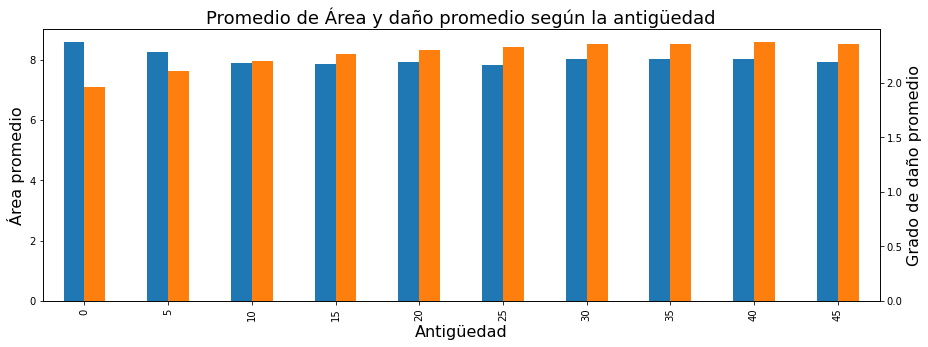

In [17]:
g = grouped_by_age.set_index('age').loc[:,['area_percentage_mean','damage_grade_mean']].head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de Área y daño promedio según la antigüedad', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Área promedio', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)

Text(0, 0.5, 'Grado de daño promedio')

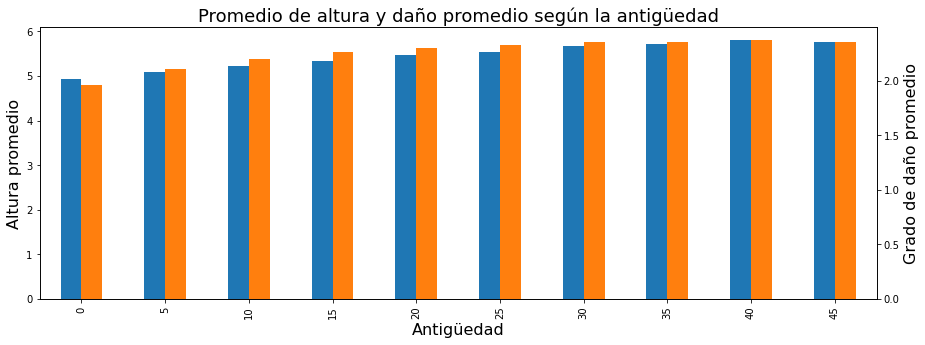

In [18]:
g = grouped_by_age.set_index('age').loc[:,['height_percentage_mean','damage_grade_mean']].head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de altura y daño promedio según la antigüedad', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Altura promedio', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)

In [144]:
#Analizamos la relación entre antigüedad, daño recibido y el material usado, ya que queremos saber si el material
#que se usa influye en cuánto persiste el edificio. Haremos el loc para quedarnos con las columnas de ID y age,
#Y luego vamos a filtrar las que fueron construidas con adobe/barro.
material_adobe = train_values['has_superstructure_adobe_mud'] == 1
adobe_persistance = damage_age[material_adobe]
adobe_persistance.head(10)

,building_id,age,damage_grade
0,802906,30,3
4,201944,30,3
17,980230,10,3
20,793397,40,2
29,529366,60,3
41,677028,30,2
58,624119,25,3
85,67684,50,3
105,820425,30,2
116,170270,40,3


In [145]:
grouped_by_age = adobe_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]
grouped_by_age.head(10)

,age,houses_count,damage_grade_mean
0,0,702,2.129630
1,5,1317,2.214123
2,10,1997,2.291437
3,15,2121,2.298444
4,20,2677,2.331341
5,25,2575,2.356505
6,30,2221,2.390365
7,35,1557,2.392421
8,40,1659,2.421941
9,45,736,2.415761


(1.0, 2.6)

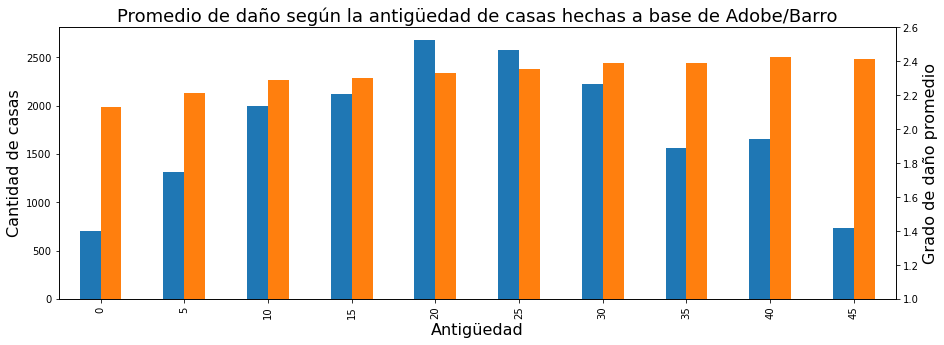

In [146]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Adobe/Barro', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [147]:
material_mortar = train_values['has_superstructure_mud_mortar_stone'] == 1
mortar_persistance = damage_age[material_mortar]

In [148]:
grouped_by_age = mortar_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

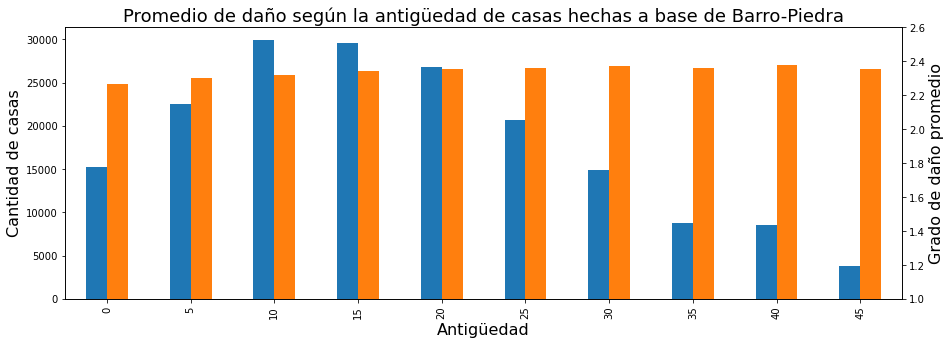

In [149]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Barro-Piedra', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [150]:
material_stone = train_values['has_superstructure_stone_flag'] == 1
stone_persistance = damage_age[material_stone]

In [151]:
grouped_by_age = stone_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

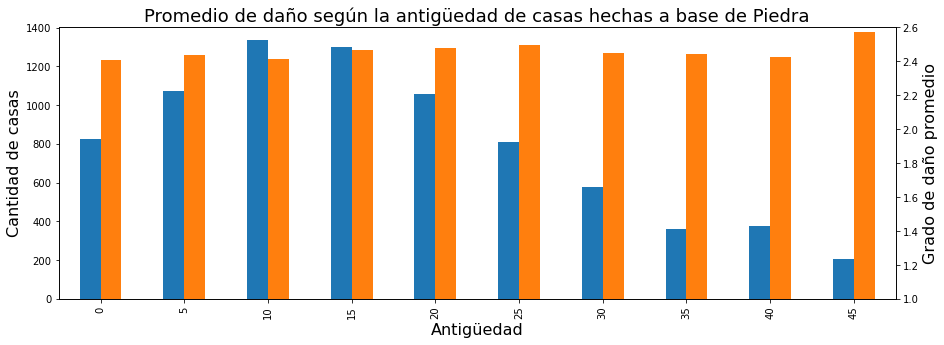

In [152]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Piedra', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [155]:
material_cement_mortar = train_values['has_superstructure_cement_mortar_stone'] == 1
cement_mortar_persistance = damage_age[material_cement_mortar]

In [156]:
grouped_by_age = cement_mortar_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

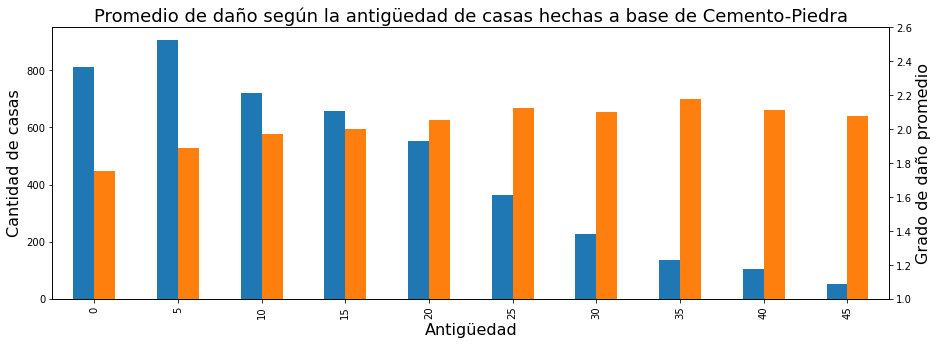

In [157]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Cemento-Piedra', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [158]:
material_mud_brick = train_values['has_superstructure_mud_mortar_brick'] == 1
mud_brick_persistance = damage_age[material_mud_brick]

In [159]:
grouped_by_age = mud_brick_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

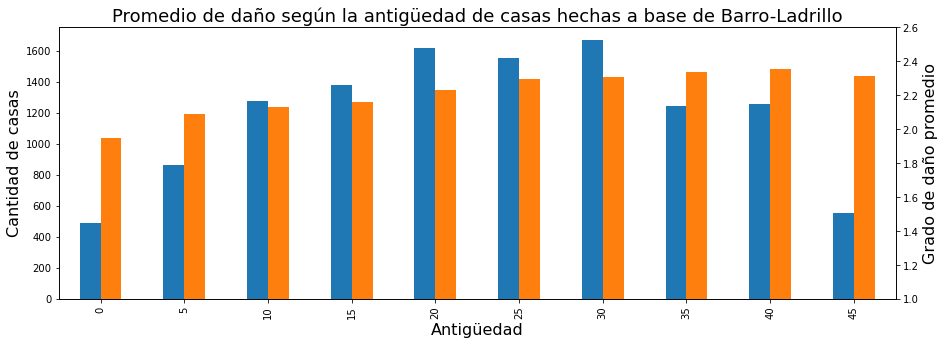

In [160]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Barro-Ladrillo', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [161]:
material_cement_brick = train_values['has_superstructure_cement_mortar_brick'] == 1
cement_brick_persistance = damage_age[material_cement_brick]

In [162]:
grouped_by_age = cement_brick_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

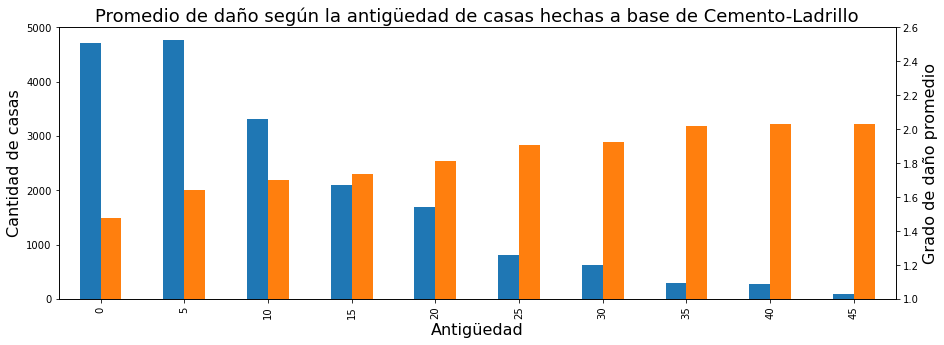

In [163]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Cemento-Ladrillo', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [164]:
material_timber = train_values['has_superstructure_timber'] == 1
timber_persistance = damage_age[material_timber]

In [165]:
grouped_by_age = timber_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

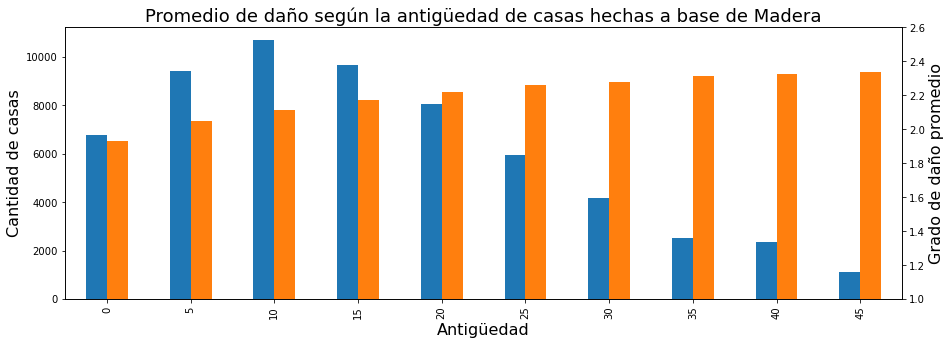

In [166]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Madera', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [167]:
material_bamboo = train_values['has_superstructure_bamboo'] == 1
bamboo_persistance = damage_age[material_bamboo]

In [168]:
grouped_by_age = bamboo_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

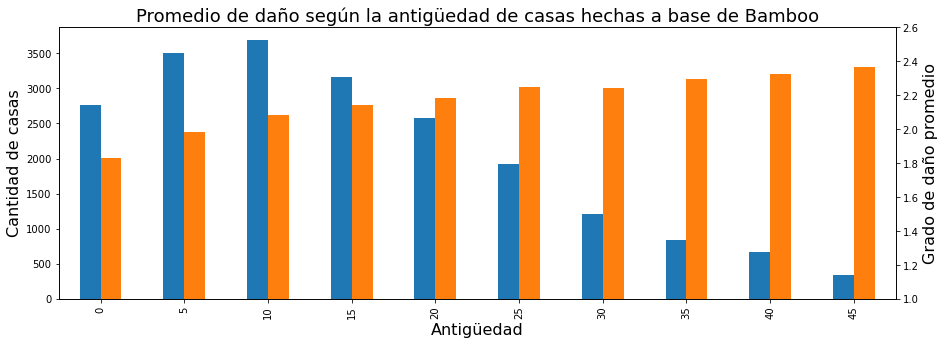

In [169]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Bamboo', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [170]:
material_rc_non_eng = train_values['has_superstructure_rc_non_engineered'] == 1
rc_non_eng_persistance = damage_age[material_rc_non_eng]

In [171]:
grouped_by_age = rc_non_eng_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

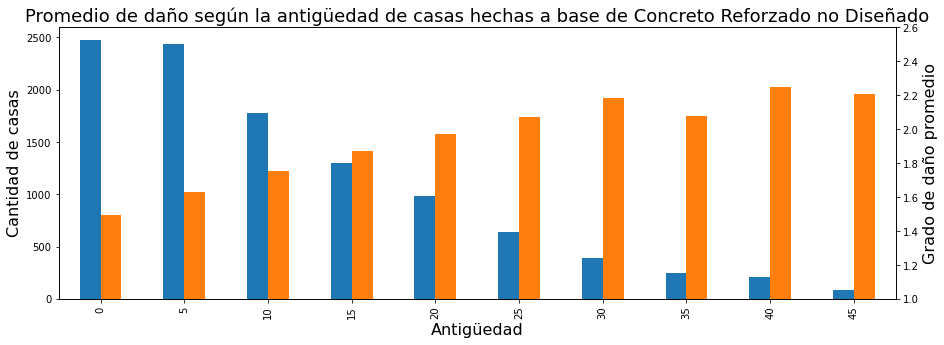

In [172]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Concreto Reforzado no Diseñado', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [173]:
material_rc_eng = train_values['has_superstructure_rc_engineered'] == 1
rc_eng_persistance = damage_age[material_rc_eng]

In [174]:
grouped_by_age = rc_eng_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

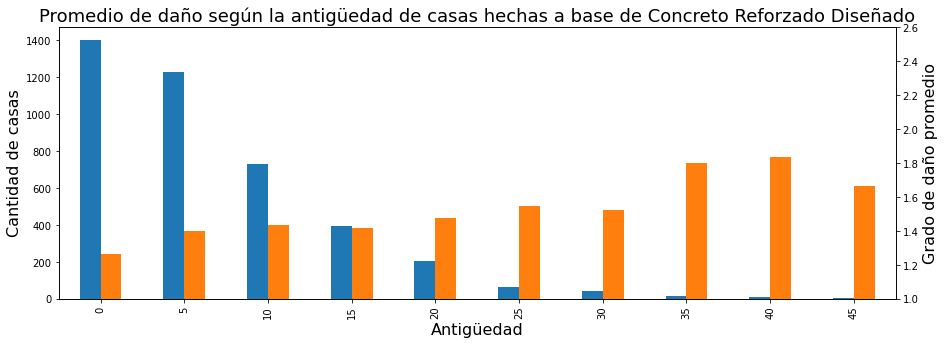

In [176]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de Concreto Reforzado Diseñado', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)

In [177]:
material_other = train_values['has_superstructure_other'] == 1
other_persistance = damage_age[material_other]

In [178]:
grouped_by_age = other_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count'}
grouped_by_age = grouped_by_age.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'damage_grade_mean']
grouped_by_age = grouped_by_age[new_col_order]

(1.0, 2.6)

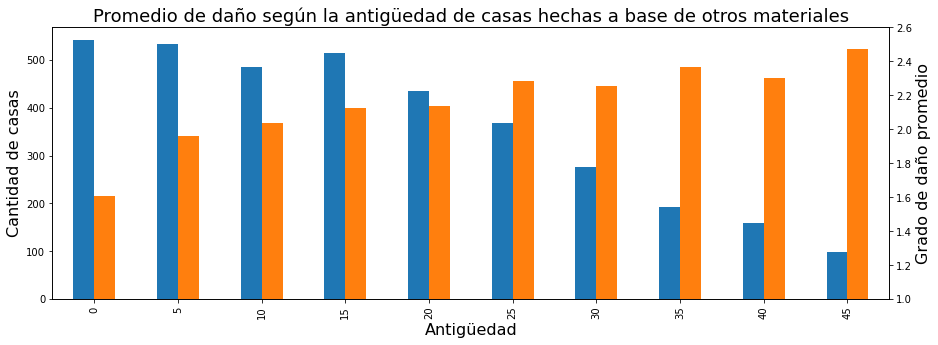

In [180]:
g = grouped_by_age.set_index('age').head(10).plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad de casas hechas a base de otros materiales', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidad de casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)
g.right_ax.set_ylim(1,2.6)